In [1]:
import pandas as pd 
import numpy as np 
from plotnine import *

In [2]:
df_clientes = pd.read_csv("Dataset_Clientes.csv", na_values='#N/D') # asumimos que el caracter #N/D es nulo 

df_clientes.columns

Index(['ID', 'ANTIG_UEDÄD', 'STATUS', 'MONTO', 'MEDIO_PAGO', 'PAQUETE',
       'ID_OFERTA', 'MAPEO_PR', 'PROBABILIDAD'],
      dtype='object')

# 1. Determinar cuanto debe pagarse al proveedor:

> Respuesta:

> b. 50% puesto que no se trata de un modelo predictivo, solamente de segmentación 
> Como se verá en las gráficas de la sección 2.a y 2.b. Podemos afirmar que los segmentos de cada una de las columnas  ‘BAJA’, ‘IMPAGO’ y ‘REINSTALACION’ con la variable  ´PROBABILIDAD’ proporcionan poca información para predecir un valor. Por otro lado la columna 'MAPEO_PR' sirve para segmentar aunque tiene grandes areas de oportunidad. 
> Además por la redacción del caso la probabilidad induce las etiquetas de la variable ‘MAPEO_PR’ que contiene las acciones a realizar por cada segmento. Lo anterior es una buena práctica en las metodologías de segmentación. 




Para este punto reuniremos la información de la tabla ´CLIENTE´, ´PREMIUM´, ´ESFUERZO' y ´MOVIMIENTOS DE CUENTA'. Cuidando de no tener registros duplicados. 


__Nota en la última tabla tenemos información de pagos de clientes en meses y en la de clientes información de usuarios, por lo que las unidades de observación son diferentes__

In [3]:
df_clientes = df_clientes[["ID", 'ANTIG_UEDÄD',   'MONTO', 'MEDIO_PAGO', 'PAQUETE', 'MAPEO_PR', 'PROBABILIDAD'] ].drop_duplicates()
df_clientes

,ID,ANTIG_UEDÄD,MONTO,MEDIO_PAGO,PAQUETE,MAPEO_PR,PROBABILIDAD
0,L84FA4LLO0,07 A 11,217868.615,NaN,SPURS,2,0.5707
1,LLOLFAZ48Z,24 A 47,243753.995,TYP2,SPURS,4,0.4848
2,LO0FAFAV9FALO,60 Y MAS,237282.650,BITCOIN,VIKING ARMOUR,2,0.5843
3,L9V94FA90,00 A 06,161783.625,NaN,SPURS,N,0.5989
4,LLLOZZVZ8,48 A 60,NaN,NaN,SPURS,NaN,0.4894
...,...,...,...,...,...,...,...
13562,L800V809,12 A 23,289053.410,BITCOIN,VIKING ARMOUR,2,0.7389
13563,L84L0FA8V,07 A 11,237282.650,NaN,VIKING ARMOUR,2,0.7050
13564,L880VLO4Z,00 A 06,NaN,NaN,VIKING ARMOUR,NaN,0.9872
13565,L89LOFA9FA0,07 A 11,217868.615,ETHER,SPURS,N,0.6350


In [4]:
df_movientos = pd.read_csv("Dataset_MovimientosCuenta.csv")
print(  len(df_movientos.ID.unique()))
df_movientos = df_movientos.dropna()
h_indice = df_movientos.BAJA == 'H'
df_movientos = df_movientos[~h_indice]
h_indice = df_movientos.IMPAGO == 33
df_movientos = df_movientos[~h_indice]
h_indice = df_movientos.IMPAGO == 1202
df_movientos = df_movientos[~h_indice]
h_indice = df_movientos.REINSTALACION == 666666
df_movientos = df_movientos[~h_indice]


print(  len(df_movientos.ID.unique()))

df_movientos

2904
2883


,PERIODO,ID,BAJA,IMPAGO,REINSTALACION,COST_X
1,202102,LLOLFAZ48Z,0,2,2,36.6
2,202101,LO0FAFAV9FALO,0,3,0,79.8
4,202102,LLLOZZVZ8,0,2,0,59.8
5,202012,L9L984FAV,0,2,0,27.8
6,202102,L90ZLO4LOZ,0,3,3,44.9
...,...,...,...,...,...,...
3770,202101,L9LOZ9FAZ4,0,3,0,60.3
3771,202101,LLO4LFALO4FA,0,1,0,85.3
3772,202101,LLV00VZ0,0,1,1,80.3
3773,202012,L88LO04,0,0,2,80.6


Cuidamos de trabajar con ids de clientes que se encuentren en las tablas de clientes asi como de movimientos de cuentas para evaluar correctamente el trabajo de la compañia

Notamos que en la tabla de movimientos de cuentas existen registros con valores inusuales para BAJAS, IMPAGOS y REINSLACIONES, los valores 'H', '33', '1202' y '666666' que se encuentran fuera de rango y por lo cual los eliminamos. 

In [5]:
data = pd.merge( df_movientos[[ 'ID', 'BAJA', 'IMPAGO', 'REINSTALACION']], df_clientes, how='left', on='ID').drop_duplicates()
data

,ID,BAJA,IMPAGO,REINSTALACION,ANTIG_UEDÄD,MONTO,MEDIO_PAGO,PAQUETE,MAPEO_PR,PROBABILIDAD
0,LLOLFAZ48Z,0,2,2,24 A 47,243753.995,TYP2,SPURS,4,0.4848
1,LLOLFAZ48Z,0,2,2,12 A 23,243753.995,TYP2,SPURS,4,0.4947
2,LO0FAFAV9FALO,0,3,0,60 Y MAS,237282.650,BITCOIN,VIKING ARMOUR,2,0.5843
3,LO0FAFAV9FALO,0,3,0,60 Y MAS,237282.650,BITCOIN,VIKING ARMOUR,2,0.2917
4,LLLOZZVZ8,0,2,0,48 A 60,NaN,NaN,SPURS,NaN,0.4894
...,...,...,...,...,...,...,...,...,...,...
8064,L88LO04,0,0,2,07 A 11,NaN,NaN,SPURS,NaN,0.6648
8065,L800V809,0,3,0,07 A 11,289053.410,BITCOIN,VIKING ARMOUR,2,0.7934
8066,L800V809,0,3,0,12 A 23,289053.410,BITCOIN,VIKING ARMOUR,2,0.5226
8067,L800V809,0,3,0,12 A 23,289053.410,BITCOIN,VIKING ARMOUR,2,0.1755


In [6]:
indice_monto = data.MONTO.isna()
data.loc[indice_monto, :].describe(include='all')

,ID,BAJA,IMPAGO,REINSTALACION,ANTIG_UEDÄD,MONTO,MEDIO_PAGO,PAQUETE,MAPEO_PR,PROBABILIDAD
count,2016,2016,2016.000000,2016.000000,2016,0.0,19,2006,24,2016.000000
unique,675,5,NaN,NaN,6,NaN,4,5,2,NaN
top,LLOL9ZL04,0,NaN,NaN,00 A 06,NaN,GOLD,VIKING ARMOUR,N,NaN
freq,10,1854,NaN,NaN,503,NaN,10,863,13,NaN
mean,NaN,NaN,1.152282,1.023313,NaN,NaN,NaN,NaN,NaN,0.488284
std,NaN,NaN,1.238796,1.221378,NaN,NaN,NaN,NaN,NaN,0.286067
min,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000400
25%,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.240050
50%,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.489400
75%,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.716350


In [7]:
print(data.isna().sum() )
data = data.dropna()
data.isna().sum()


ID                  0
BAJA                0
IMPAGO              0
REINSTALACION       0
ANTIG_UEDÄD         0
MONTO            2016
MEDIO_PAGO       3077
PAQUETE            36
MAPEO_PR         1992
PROBABILIDAD        0
dtype: int64


ID               0
BAJA             0
IMPAGO           0
REINSTALACION    0
ANTIG_UEDÄD      0
MONTO            0
MEDIO_PAGO       0
PAQUETE          0
MAPEO_PR         0
PROBABILIDAD     0
dtype: int64

Podemos ver que los registros sin probabilidad no tienen un monto ni valor de mapeo por lo que los eliminamos tambien 

# 2. Explicar qué es lo que se encuentra en el campo “PROBABILIDAD”

> Respuesta : 

> La mayoría de algoritmos de clasificación utilizan como base métricas para medir conjuntos con uno o más elementos y luego unirlos. La probabilidad en estas implementaciones suelen ser algún tipo de score que es función de la distancia entre dos conjuntos de alguna iteración entre el máximo de la distancia encontrada en esa iteración, por ello es un valor en [0,1]. 

> En este caso fue posible encontrar la función de distribución con que se generó la columna ‘PROBABILIDAD’ en el ejercicio. 





Primero veamos su función de distribución 



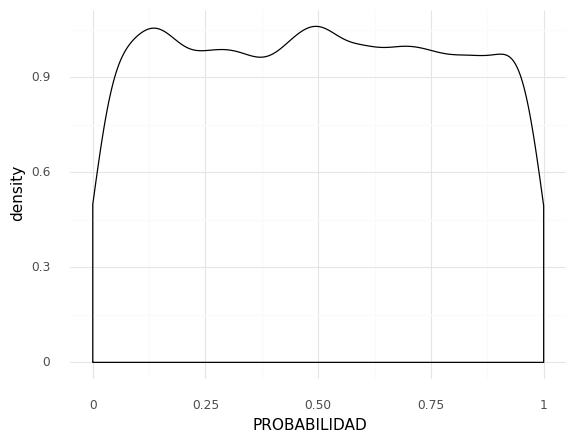

<ggplot: (308551596)>

In [8]:
ggplot( df_clientes, aes( x="PROBABILIDAD" ) ) + geom_density( ) + theme_minimal()

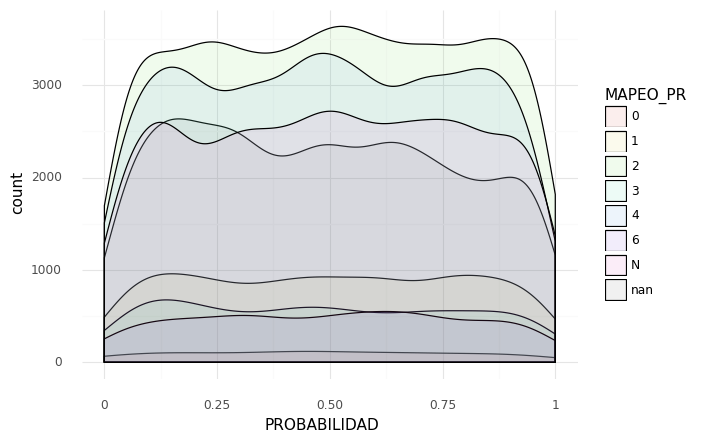

<ggplot: (272471968)>

In [9]:
ggplot( df_clientes, aes(fill = "MAPEO_PR", x="PROBABILIDAD" ) ) + geom_density(aes(y=after_stat('count')), alpha=0.1) + theme_minimal()#+ geom_jitter()#geom_point(aes(color="MAPEO_PR"))

__Notamos que la función de distrución de ´PROBABILIDAD´ se parece mucho a una uniforme en [0,1]__ por lo que realizaremos una prueba Kolmogorov simulando valores en el mismo intervalo. 


/var/folders/j2/9bhvdzrs5bzgn96g449k238r0000gn/T/ipykernel_4659/2372776350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


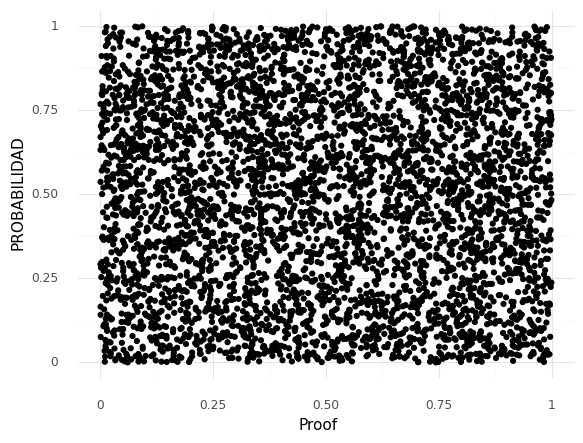

<ggplot: (308741105)>

In [10]:
rng = np.random.default_rng(seed=0)
data["Proof"] = rng.uniform(size=data.shape[0])
ggplot( data, aes(x = "Proof", y="PROBABILIDAD" ) ) + geom_point() +theme_minimal()

In [11]:
from scipy import stats
stats.kstest(data.Proof, data.PROBABILIDAD)

KstestResult(statistic=0.01734475374732334, pvalue=0.48356892484783703, statistic_location=0.43969944996553134, statistic_sign=1)

Concluimos que los valores de esta columna fueron creados aleatoriamente.



In [12]:

data.BAJA = data.BAJA.apply(int)


/var/folders/j2/9bhvdzrs5bzgn96g449k238r0000gn/T/ipykernel_4659/2330456608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### a. Mostrar cuál es la relación con el “MAPEO_PR”

> Respuesta: 
> Las siguientes gráficas muestran la relación entre la columna ‘PROBABILIDAD’ y los segmentos de la columna ‘MAPEO_PR’. 

> Se puede apreciar que los segmentos ‘2’, ‘4’ y ‘N’ contienen un elevado número de elementos mientras que los segmentos ‘0’ y ‘6’ contienen un número bajo de los mismos. 
Por otro lado, un gran número de registros no fueron clasificados (valores ‘Nan’).
Una buena segmentación debe de cuidar de tener que los segmentos poseen un número balanceado de elementos en cada segmento, en este punto se puede decir que la compañía cumplió con su objetivo de segmentar pero tiene áreas de oportunidad. 

Como ya vimos la distribución uniforme de la probabilidad se debe de repetir en cada uno de los estratos de los segmentos contenidos en la variable ´MAPEO_PR', lo verificamos en las siguientes graficas

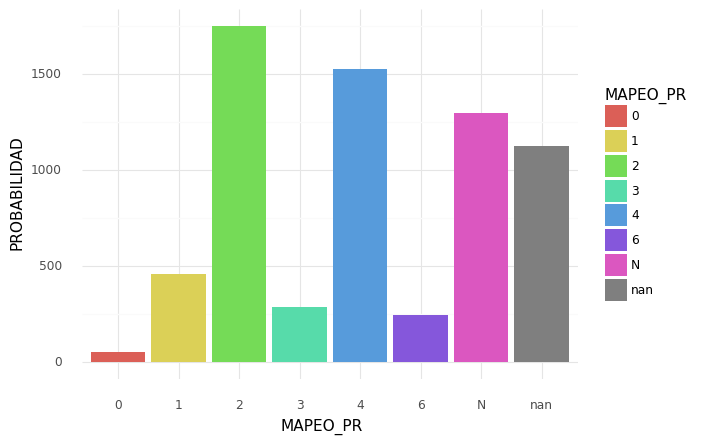

<ggplot: (308735582)>

In [13]:
ggplot( df_clientes, aes(x = "MAPEO_PR", y="PROBABILIDAD" , fill="MAPEO_PR") ) + geom_col() + theme_minimal()#geom_point(aes(color="MAPEO_PR"))

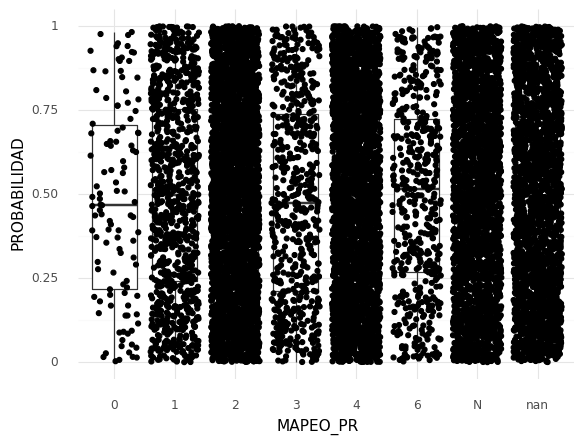

<ggplot: (308743524)>

In [14]:
ggplot( df_clientes, aes(x="MAPEO_PR",  y="PROBABILIDAD" ) ) + geom_boxplot() + geom_jitter()+ theme_minimal()


In [15]:
df_servicio = pd.read_csv("Dataset_Premium.csv")
data = pd.merge(data, df_servicio, how='left', on='ID').drop_duplicates()
data

,ID,BAJA,IMPAGO,REINSTALACION,ANTIG_UEDÄD,MONTO,MEDIO_PAGO,PAQUETE,MAPEO_PR,PROBABILIDAD,Proof,PREMIUM
0,LLOLFAZ48Z,0,2,2,24 A 47,243753.995,TYP2,SPURS,4,0.4848,0.636962,NaN
1,LLOLFAZ48Z,0,2,2,12 A 23,243753.995,TYP2,SPURS,4,0.4947,0.269787,NaN
2,LO0FAFAV9FALO,0,3,0,60 Y MAS,237282.650,BITCOIN,VIKING ARMOUR,2,0.5843,0.040974,NaN
3,LO0FAFAV9FALO,0,3,0,60 Y MAS,237282.650,BITCOIN,VIKING ARMOUR,2,0.2917,0.016528,NaN
4,L9L984FAV,0,2,0,00 A 06,181197.660,TYP2,SPURS,N,0.1531,0.813270,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5486,LLV00VZ0,0,1,1,24 A 47,159626.510,0,SOIL,1,0.1141,0.740440,NaN
5487,L800V809,0,3,0,07 A 11,289053.410,BITCOIN,VIKING ARMOUR,2,0.7934,0.149354,NaN
5488,L800V809,0,3,0,12 A 23,289053.410,BITCOIN,VIKING ARMOUR,2,0.5226,0.057519,NaN
5489,L800V809,0,3,0,12 A 23,289053.410,BITCOIN,VIKING ARMOUR,2,0.1755,0.461379,NaN


In [16]:
df_esfuerzo = pd.read_csv("Dataset_Esfuerzo.csv")
data = pd.merge(data, df_esfuerzo, how='left', on='ID').drop_duplicates()
data

,ID,BAJA,IMPAGO,REINSTALACION,ANTIG_UEDÄD,MONTO,MEDIO_PAGO,PAQUETE,MAPEO_PR,PROBABILIDAD,Proof,PREMIUM,GASTO
0,LLOLFAZ48Z,0,2,2,24 A 47,243753.995,TYP2,SPURS,4,0.4848,0.636962,NaN,NaN
1,LLOLFAZ48Z,0,2,2,12 A 23,243753.995,TYP2,SPURS,4,0.4947,0.269787,NaN,NaN
2,LO0FAFAV9FALO,0,3,0,60 Y MAS,237282.650,BITCOIN,VIKING ARMOUR,2,0.5843,0.040974,NaN,NaN
3,LO0FAFAV9FALO,0,3,0,60 Y MAS,237282.650,BITCOIN,VIKING ARMOUR,2,0.2917,0.016528,NaN,NaN
4,L9L984FAV,0,2,0,00 A 06,181197.660,TYP2,SPURS,N,0.1531,0.813270,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8471,LLV00VZ0,0,1,1,24 A 47,159626.510,0,SOIL,1,0.1141,0.740440,NaN,1
8476,L800V809,0,3,0,07 A 11,289053.410,BITCOIN,VIKING ARMOUR,2,0.7934,0.149354,NaN,NaN
8477,L800V809,0,3,0,12 A 23,289053.410,BITCOIN,VIKING ARMOUR,2,0.5226,0.057519,NaN,NaN
8478,L800V809,0,3,0,12 A 23,289053.410,BITCOIN,VIKING ARMOUR,2,0.1755,0.461379,NaN,NaN


In [17]:
data.PREMIUM = data.PREMIUM.astype('Int32')
data.GASTO = data.GASTO.astype('Int32')
data.describe()

,BAJA,IMPAGO,REINSTALACION,MONTO,PROBABILIDAD,Proof,PREMIUM,GASTO
count,4685.000000,4685.000000,4685.000000,4.685000e+03,4685.000000,4685.000000,299.0,1246.0
mean,0.633084,1.316756,0.474920,2.523002e+05,0.501193,0.498961,1.0,1.0
std,1.095783,1.259290,0.963278,1.081911e+05,0.287191,0.289000,0.0,0.0
min,0.000000,0.000000,0.000000,3.451384e+04,0.000100,0.000190,1.0,1.0
25%,0.000000,0.000000,0.000000,1.768834e+05,0.252200,0.248188,1.0,1.0
50%,0.000000,1.000000,0.000000,2.372826e+05,0.510800,0.497165,1.0,1.0
75%,1.000000,3.000000,0.000000,2.955248e+05,0.744300,0.753061,1.0,1.0
max,3.000000,3.000000,3.000000,1.163116e+06,0.999300,0.999566,1.0,1.0


### b. Explicar por qué si o porqué NO se trata de un modelo predictivo

Veamos que la variable ´PROBABILIDAD´(con distribución uniforme) se distribuye equiparablemente en los estratos de las variables 'BAJA', 'IMPAGOS', 'REINSTALACIONES' y 'MONTO' por lo que no proporciona información que permita predecir el comportamiento en los proximos tres meses  (o la suma de las tres primeras )

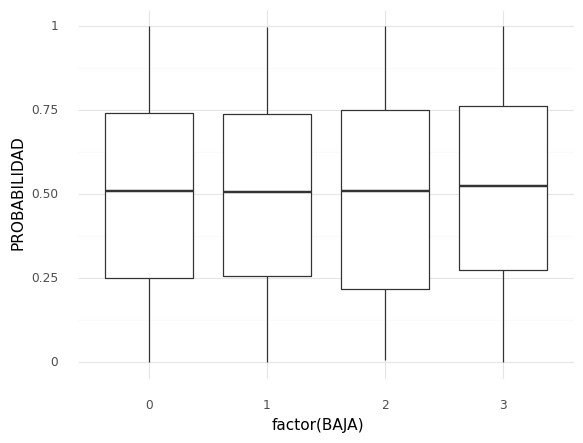

<ggplot: (309555131)>

In [18]:
ggplot( data, aes(x="factor(BAJA)",  y="PROBABILIDAD" ) ) + geom_boxplot() + theme_minimal()


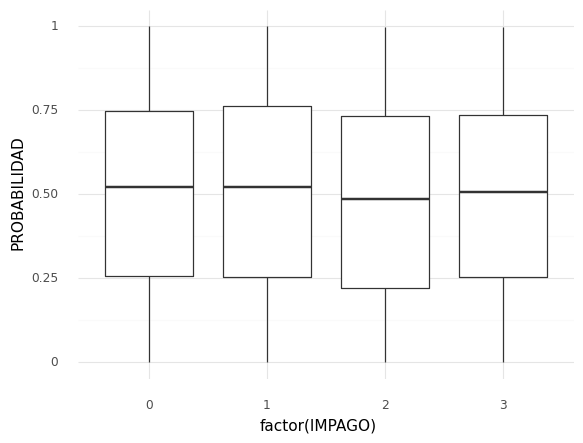

<ggplot: (309552089)>

In [19]:
ggplot( data, aes(x="factor(IMPAGO)",  y="PROBABILIDAD" ) ) + geom_boxplot() + theme_minimal()


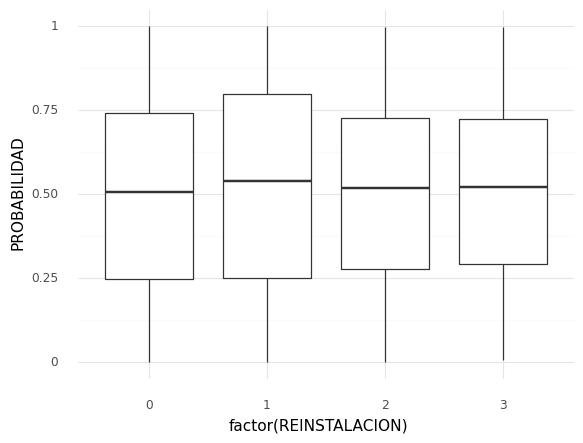

<ggplot: (309565148)>

In [20]:
ggplot( data, aes(x="factor(REINSTALACION)",  y="PROBABILIDAD" ) ) + geom_boxplot() + theme_minimal()


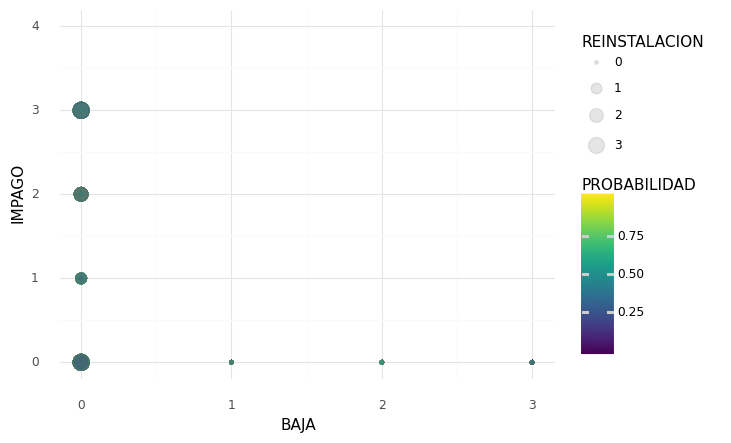

<ggplot: (309651703)>

In [21]:
ggplot( data, aes(x = "BAJA", y="IMPAGO", size="REINSTALACION", color="PROBABILIDAD" ) ) + geom_point( alpha=0.1) + ylim([0, 4])+theme_minimal()

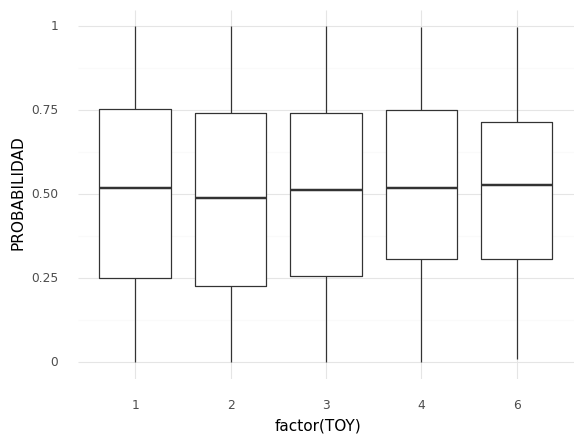

<ggplot: (309709379)>

In [22]:
data["TOY"] = data.apply(lambda x: x["BAJA"] + x["IMPAGO"] + x["REINSTALACION"], axis=1)

ggplot( data, aes(x = "factor(TOY)", y="PROBABILIDAD" ) ) + geom_boxplot() +theme_minimal()#+ geom_jitter()#geom_point(aes(color="MAPEO_PR"))

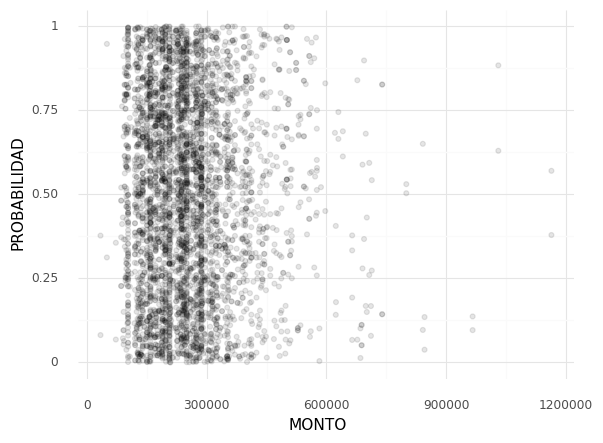

<ggplot: (309740683)>

In [23]:
ggplot( data, aes(x = "MONTO", y="PROBABILIDAD" ) ) + geom_point( alpha=0.1) + theme_minimal()

# 3. análisis descriptivo de los segmentos contenidos en el campo “MAPEO_PR”.

In [24]:
data = pd.read_csv("Dataset_Clientes.csv", na_values='#N/D') # asumimos que el caracter #N/D es nulo 

data = data.drop(["STATUS", "ID_OFERTA", "PROBABILIDAD"], axis = 1).drop_duplicates()
print(len(data.ID.unique()))
df_temp = pd.read_csv("Dataset_Premium.csv")
data = pd.merge( data, df_temp, on='ID', how='left').drop_duplicates()
df_temp = pd.read_csv( "Dataset_Esfuerzo.csv")
data = pd.merge( data, df_temp, on='ID', how='left').drop_duplicates()

data

8969


,ID,ANTIG_UEDÄD,MONTO,MEDIO_PAGO,PAQUETE,MAPEO_PR,PREMIUM,GASTO
0,L84FA4LLO0,07 A 11,217868.615,NaN,SPURS,2,NaN,NaN
1,LLOLFAZ48Z,24 A 47,243753.995,TYP2,SPURS,4,NaN,NaN
2,LO0FAFAV9FALO,60 Y MAS,237282.650,BITCOIN,VIKING ARMOUR,2,NaN,NaN
3,L9V94FA90,00 A 06,161783.625,NaN,SPURS,N,NaN,1
8,LLLOZZVZ8,48 A 60,NaN,NaN,SPURS,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
19987,LLO0LO0LO49,12 A 23,278267.835,0,SPURS,3,NaN,1
19992,L8V0LO09L,00 A 06,150998.050,NaN,SOIL,N,NaN,NaN
19993,L94V4FA0L,07 A 11,187669.005,NaN,SOIL,N,NaN,1
19998,L880VLO4Z,00 A 06,NaN,NaN,VIKING ARMOUR,NaN,NaN,NaN


In [25]:
df = data.groupby('ID')['MONTO'].count()
df.reset_index()
index = df > 1
#df.iloc[index, :]
df[index]
data.loc[data.ID=='8000FAVZFA', :]

,ID,ANTIG_UEDÄD,MONTO,MEDIO_PAGO,PAQUETE,MAPEO_PR,PREMIUM,GASTO
15859,8000FAVZFA,48 A 60,250225.34,0,VIKING ARMOUR,4,NaN,NaN
17446,8000FAVZFA,60 Y MAS,250225.34,0,VIKING ARMOUR,4,NaN,NaN


#### %Clientes en el segmento


In [26]:
print (len(data.ID.unique()))
data.groupby(['MAPEO_PR'])['MAPEO_PR'].agg('count') /data.shape[0]

8969


MAPEO_PR
0    0.007834
1    0.068683
2    0.262616
3    0.042722
4    0.229914
6    0.037621
N    0.193478
Name: MAPEO_PR, dtype: float64

In [27]:
data.groupby(['MAPEO_PR', 'ANTIG_UEDÄD'])['MAPEO_PR'].agg('count')

MAPEO_PR  ANTIG_UEDÄD
0         07 A 11          14
          12 A 23          41
          24 A 47          28
          48 A 60           2
          60 Y MAS          1
1         07 A 11         159
          12 A 23         296
          24 A 47         181
          48 A 60          46
          60 Y MAS         72
2         07 A 11         409
          12 A 23         737
          24 A 47         577
          48 A 60         246
          60 Y MAS        914
3         07 A 11          15
          12 A 23          68
          24 A 47         191
          48 A 60          78
          60 Y MAS        117
4         07 A 11          53
          12 A 23         293
          24 A 47         777
          48 A 60         331
          60 Y MAS       1070
6         12 A 23           3
          24 A 47          82
          48 A 60          65
          60 Y MAS        263
N         00 A 06        1409
          07 A 11         715
Name: MAPEO_PR, dtype: int64

In [28]:
t = data.groupby(['MAPEO_PR'])[ 'MONTO'].agg('mean')
t = pd.DataFrame(t).reset_index()
t

,MAPEO_PR,MONTO
0,0,227791.344000
1,1,194892.324310
2,2,197162.571337
3,3,292798.235230
4,4,317041.549804
5,6,470675.180746
6,N,215313.734113


In [29]:
data.describe()

,MONTO,PREMIUM
count,9.221000e+03,526.0
mean,2.513549e+05,1.0
std,1.103072e+05,0.0
min,-1.682550e+04,1.0
25%,1.768834e+05,1.0
50%,2.372826e+05,1.0
75%,2.912105e+05,1.0
max,1.226104e+06,1.0


In [30]:
data.groupby(["MAPEO_PR", "MEDIO_PAGO"])['MAPEO_PR', "MEDIO_PAGO"].agg('count')

/var/folders/j2/9bhvdzrs5bzgn96g449k238r0000gn/T/ipykernel_4659/1079068031.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


MAPEO_PR  MEDIO_PAGO
MAPEO_PR MEDIO_PAGO                      
0        0                 84          84
         BITCOIN            2           2
1        0                470         470
         BITCOIN           94          94
         ETHER             43          43
         GOLD              66          66
         TYP2              14          14
         USD                1           1
2        0                871         871
         BITCOIN          625         625
         ETHER            295         295
         GOLD             665         665
         TYP2             149         149
         USD               52          52
3        0                379         379
         BITCOIN           49          49
         ETHER             14          14
         GOLD              14          14
         TYP2               5           5
         USD                2           2
4        0                689         689
         BITCOIN          725         725
         ETHER            262         262
         GOLD             556         556
         TYP2             190         190
         USD               53          53
6        0                 80          80
         BITCOIN          155         155
         ETHER             48          48
         GOLD              73          73
         TYP2              38          38
         USD               15          15
N        0                389         389
         BITCOIN          278         278
         ETHER            105         105
         GOLD             317         317
         TYP2              78          78
         USD               14          14

In [31]:
data

,ID,ANTIG_UEDÄD,MONTO,MEDIO_PAGO,PAQUETE,MAPEO_PR,PREMIUM,GASTO
0,L84FA4LLO0,07 A 11,217868.615,NaN,SPURS,2,NaN,NaN
1,LLOLFAZ48Z,24 A 47,243753.995,TYP2,SPURS,4,NaN,NaN
2,LO0FAFAV9FALO,60 Y MAS,237282.650,BITCOIN,VIKING ARMOUR,2,NaN,NaN
3,L9V94FA90,00 A 06,161783.625,NaN,SPURS,N,NaN,1
8,LLLOZZVZ8,48 A 60,NaN,NaN,SPURS,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
19987,LLO0LO0LO49,12 A 23,278267.835,0,SPURS,3,NaN,1
19992,L8V0LO09L,00 A 06,150998.050,NaN,SOIL,N,NaN,NaN
19993,L94V4FA0L,07 A 11,187669.005,NaN,SOIL,N,NaN,1
19998,L880VLO4Z,00 A 06,NaN,NaN,VIKING ARMOUR,NaN,NaN,NaN


In [32]:
data.groupby(['MAPEO_PR', 'PAQUETE'])['PAQUETE'].agg(['count']) 


count
MAPEO_PR PAQUETE             
0        DRAGONS            6
         NAVAL              1
         SOIL              16
         SPURS             26
         VIKING ARMOUR     37
1        DRAGONS          130
         NAVAL             29
         SOIL             208
         SPURS            168
         VIKING ARMOUR    218
2        DRAGONS          971
         NAVAL            141
         SOIL             529
         SPURS            377
         VIKING ARMOUR    856
3        DRAGONS            4
         NAVAL             35
         SOIL              10
         SPURS            162
         VIKING ARMOUR    255
4        0                  1
         DRAGONS           73
         NAVAL            195
         SOIL              37
         SPURS            467
         VIKING ARMOUR   1734
6        DRAGONS            1
         NAVAL             13
         SOIL               4
         SPURS             51
         VIKING ARMOUR    337
N        DRAGONS           92
         NAVAL              3
         SOIL             377
         SPURS            629
         VIKING ARMOUR   1015

In [33]:
data.groupby(['MAPEO_PR'])['PREMIUM'].agg(['count']) / data.shape[0]

,count
MAPEO_PR,
0,0.000182
1,0.001366
2,0.006194
3,0.003826
4,0.025597
6,0.008471
N,0.002277


In [34]:
data.groupby(['MAPEO_PR'])['GASTO'].agg(['count']) / data.shape[0]

,count
MAPEO_PR,
0,0.004828
1,0.019038
2,0.037803
3,0.013117
4,0.039443
6,0.004737
N,0.021589


# 4. Explicar si efectivamente el campo “MAPEO_PR” permite inferir algún comportamiento en términos de los MOVIMIENTOS DE CUENTA observados

> Respuesta:
> Se efectuó una prueba de medias al monto a los pares de los segmentos (0,1), (1,2), (2,3), (3,4), (4,6) y (6,N) la cual respalda la evidencia gráfica del punto 2.b relativa a la igualdad de la respuesta de los segmentos. 
De igual manera la estimación puntual de las proporciones de los clientes con movimientos con bajas, impagos y reinstalaciones son bastantes parecidas entre los segmentos por lo que podemos concluir que el campo ´MAPEO_PR’ no permite inferir algún comportamiento en términos de la información de movimientos de cuenta de la que se dispone. 





In [35]:
df_temp = pd.read_csv("Dataset_MovimientosCuenta.csv")
df_temp = df_temp.drop(["PERIODO", 'COST_X'], axis=1)
data = pd.merge( data, df_temp, how='left').drop_duplicates()
data 

,ID,ANTIG_UEDÄD,MONTO,MEDIO_PAGO,PAQUETE,MAPEO_PR,PREMIUM,GASTO,BAJA,IMPAGO,REINSTALACION
0,L84FA4LLO0,07 A 11,217868.615,NaN,SPURS,2,NaN,NaN,H,2.0,0.0
1,L84FA4LLO0,07 A 11,217868.615,NaN,SPURS,2,NaN,NaN,0,2.0,2.0
2,LLOLFAZ48Z,24 A 47,243753.995,TYP2,SPURS,4,NaN,NaN,0,2.0,2.0
3,LO0FAFAV9FALO,60 Y MAS,237282.650,BITCOIN,VIKING ARMOUR,2,NaN,NaN,0,3.0,0.0
4,L9V94FA90,00 A 06,161783.625,NaN,SPURS,N,NaN,1,NaN,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
12121,L94V4FA0L,07 A 11,187669.005,NaN,SOIL,N,NaN,1,0,1.0,0.0
12122,L94V4FA0L,07 A 11,187669.005,NaN,SOIL,N,NaN,1,0,0.0,1.0
12123,L880VLO4Z,00 A 06,NaN,NaN,VIKING ARMOUR,NaN,NaN,NaN,0,3.0,0.0
12124,L880VLO4Z,00 A 06,NaN,NaN,VIKING ARMOUR,NaN,NaN,NaN,0,0.0,3.0


In [36]:
data.groupby(['MAPEO_PR', 'ANTIG_UEDÄD'])['MAPEO_PR'].agg('count')

MAPEO_PR  ANTIG_UEDÄD
0         07 A 11          16
          12 A 23          45
          24 A 47          29
          48 A 60           2
          60 Y MAS          1
1         07 A 11         179
          12 A 23         320
          24 A 47         200
          48 A 60          53
          60 Y MAS         74
2         07 A 11         446
          12 A 23         790
          24 A 47         614
          48 A 60         258
          60 Y MAS        939
3         07 A 11          17
          12 A 23          78
          24 A 47         206
          48 A 60          83
          60 Y MAS        120
4         07 A 11          66
          12 A 23         320
          24 A 47         805
          48 A 60         340
          60 Y MAS       1093
6         12 A 23           3
          24 A 47          90
          48 A 60          66
          60 Y MAS        267
N         00 A 06        1584
          07 A 11         791
Name: MAPEO_PR, dtype: int64

In [37]:
t = data.groupby(['MAPEO_PR'])[ 'MONTO'].agg('mean')
t = pd.DataFrame(t).reset_index()
t['MAPEO_PR']= ['0', '1','2','3','4','6', 'N']
t

,MAPEO_PR,MONTO
0,0,226186.264882
1,1,195746.522627
2,2,196689.836166
3,3,295462.267145
4,4,317124.513080
5,6,468322.831991
6,N,215681.752983


In [38]:
for _ in t.index:
    if _ < (t.shape[0]-1) :
        grupo1 = t.loc[_, "MAPEO_PR"]
        grupo2 = t.loc[_ +1 , "MAPEO_PR"]
        index1 = data.MAPEO_PR == grupo1
        index2 = data.MAPEO_PR == grupo2
        rebanada1 = data.loc[ index1, 'MONTO']
        rebanada2 = data.loc[ index2, 'MONTO']
        print(stats.ttest_ind(rebanada1.dropna(), rebanada2.dropna() ) )
    

Ttest_indResult(statistic=4.478826965154146, pvalue=8.455093701687984e-06)
Ttest_indResult(statistic=-0.33504808001507924, pvalue=0.737607080258873)
Ttest_indResult(statistic=-26.65450841990603, pvalue=9.052106957559013e-143)
Ttest_indResult(statistic=-4.658165853497608, pvalue=3.3235210707483e-06)
Ttest_indResult(statistic=-27.421103158340646, pvalue=3.7514573904037016e-148)
Ttest_indResult(statistic=54.50637818504961, pvalue=0.0)


In [39]:
data["BAJA_flag"] = data.BAJA == '0' 
data.groupby(['MAPEO_PR', 'BAJA_flag'])['BAJA_flag'].agg('count') / data.shape[0]


MAPEO_PR  BAJA_flag
0         False        0.004437
          True         0.003349
1         False        0.046969
          True         0.022187
2         False        0.199263
          True         0.055844
3         False        0.030476
          True         0.011721
4         False        0.179672
          True         0.040020
6         False        0.029052
          True         0.006614
N         False        0.118721
          True         0.080124
Name: BAJA_flag, dtype: float64

In [40]:
data["IMPAGO_flag"] = data.IMPAGO > 0 
data.groupby(['MAPEO_PR', 'IMPAGO_flag'])['IMPAGO_flag'].agg('count') / data.shape[0]


MAPEO_PR  IMPAGO_flag
0         False          0.004856
          True           0.002930
1         False          0.050653
          True           0.018503
2         False          0.206296
          True           0.048811
3         False          0.032401
          True           0.009796
4         False          0.184528
          True           0.035164
6         False          0.029973
          True           0.005693
N         False          0.131112
          True           0.067733
Name: IMPAGO_flag, dtype: float64

In [41]:
data["REINSTALACION_flag"] = data.REINSTALACION > 0 
data.groupby(['MAPEO_PR', 'REINSTALACION_flag'])['REINSTALACION_flag'].agg('count') / data.shape[0]


MAPEO_PR  REINSTALACION_flag
0         False                 0.006447
          True                  0.001340
1         False                 0.060616
          True                  0.008540
2         False                 0.232837
          True                  0.022271
3         False                 0.038513
          True                  0.003684
4         False                 0.206715
          True                  0.012977
6         False                 0.033490
          True                  0.002177
N         False                 0.166778
          True                  0.032066
Name: REINSTALACION_flag, dtype: float64

In [42]:
h_indice = data.BAJA == 'H'
data.loc[h_indice, "BAJA"] ='0' 
data.BAJA = data.BAJA.astype("Int32")
data['suma'] = data['BAJA'] + data['REINSTALACION'] + data['IMPAGO']
data["suma_flag"] = data.suma > 0 
data.groupby(['MAPEO_PR', 'suma_flag'])['suma'].agg('count') / data.shape[0]

MAPEO_PR  suma_flag
0         True         0.003851
1         True         0.028048
2         True         0.080961
3         True         0.015908
4         True         0.063212
6         True         0.009963
N         True         0.082468
Name: suma, dtype: float64

In [43]:
data.suma_flag.sum()

4560

In [44]:
data.shape

(11944, 16)